# Análisis Exploratorio de Datos - Pokémon

Este notebook contiene un análisis exploratorio del dataset de Pokémon. Vamos a:
- Explorar la estructura de los datos
- Limpiar y preparar los datos
- Realizar análisis estadístico
- Crear visualizaciones
- Identificar patrones y oportunidades de análisis

## 1. Importación de Librerías

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Carga de Datos

In [2]:
# Este comando conecta colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/pokemon_data.csv"
df = pd.read_csv(path)

## 3. Información General del Dataset

In [4]:
# Información sobre tipos de datos
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1302 non-null   int64 
 1   name             1302 non-null   object
 2   base_experience  1302 non-null   int64 
 3   height           1302 non-null   int64 
 4   weight           1302 non-null   int64 
 5   types            1302 non-null   object
 6   abilities        1302 non-null   object
 7   moves            1268 non-null   object
 8   stats            1302 non-null   object
dtypes: int64(4), object(5)
memory usage: 91.7+ KB


In [5]:
# Nombres de las columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['id', 'name', 'base_experience', 'height', 'weight', 'types', 'abilities', 'moves', 'stats']


In [11]:
#Revisamos el dataFrame
df

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."
...,...,...,...,...,...,...,...,...,...
1297,10273,ogerpon-wellspring-mask,275,12,398,"grass, water",water-absorb,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1298,10274,ogerpon-hearthflame-mask,275,12,398,"grass, fire",mold-breaker,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1299,10275,ogerpon-cornerstone-mask,275,12,398,"grass, rock",sturdy,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1300,10276,terapagos-terastal,90,3,160,normal,tera-shell,"headbutt, body-slam, take-down, double-edge, roar","hp=95, attack=95, defense=110, special-attack=..."


## 4. Limpieza de Nombres de Columnas

In [6]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Nombres de columnas actualizados:")
print(df.columns.tolist())

Nombres de columnas actualizados:
['id', 'name', 'base_experience', 'height', 'weight', 'types', 'abilities', 'moves', 'stats']


## 5. Análisis de Valores Nulos

In [7]:
 #Identificar si exiten valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
id                  0
name                0
base_experience     0
height              0
weight              0
types               0
abilities           0
moves              34
stats               0
dtype: int64


## 6. Análisis de Duplicados

In [ ]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

## 7. Análisis de Espacios Vacíos y Valores Inconsistentes

In [ ]:
# Verificar espacios vacíos en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

print("Análisis de espacios vacíos en columnas de texto:")
for col in columnas_texto:
    # Contar espacios vacíos
    espacios_vacios = df[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        print(f"\n{col}: {espacios_vacios} espacios vacíos")

    # Verificar valores únicos (primeros 10)
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos} valores únicos")
    if valores_unicos < 20:
        print(f"Valores: {df[col].value_counts().head(10).to_dict()}")

Análisis de espacios vacíos en columnas de texto:
name: 1302 valores únicos
types: 221 valores únicos
abilities: 707 valores únicos
moves: 812 valores únicos
stats: 1142 valores únicos


## 8. Estadísticas Descriptivas

In [ ]:
# Estadísticas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe().T

Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
id,1302.0,2560.927803,3949.887748,1.0,326.25,651.5,976.75,10277.0
base_experience,1302.0,161.943932,82.532554,36.0,71.00,165.0,222.50,608.0
height,1302.0,20.467742,54.180316,1.0,5.00,10.0,16.00,1000.0
weight,1302.0,980.863287,1972.645170,0.0,89.25,315.5,818.00,10000.0


In [ ]:
# Estadísticas para variables categóricas
print("Estadísticas descriptivas de variables categóricas:")
df.describe(include=['object']).T

Estadísticas descriptivas de variables categóricas:


,count,unique,top,freq
name,1302,1302,terapagos-stellar,1
types,1302,221,normal,86
abilities,1302,707,levitate,36
moves,1268,812,"headbutt, tackle, body-slam, take-down, double...",21
stats,1302,1142,"hp=35, attack=55, defense=40, special-attack=5...",16


## 9. Análisis de Tipos de Pokémon

In [ ]:
# Buscar columnas relacionadas con tipos
columnas_tipo = [col for col in df.columns if 'type' in col.lower()]

if columnas_tipo:
    print(f"Columnas de tipo encontradas: {columnas_tipo}")

    # Análisis del tipo principal
    if 'type_1' in df.columns:
        print("\nDistribución de tipos principales:")
        print(df['type_1'].value_counts())

    # Análisis del tipo secundario
    if 'type_2' in df.columns:
        tipos_secundarios = df['type_2'].value_counts()
        print(f"\nPokémon con tipo secundario: {df['type_2'].notna().sum()} ({(df['type_2'].notna().sum()/len(df)*100):.1f}%)")
        print(f"Pokémon sin tipo secundario: {df['type_2'].isna().sum()} ({(df['type_2'].isna().sum()/len(df)*100):.1f}%)")

Columnas de tipo encontradas: ['types']


## 10. Imputación de Valores Faltantes

In [9]:
# Crear una copia del dataframe para trabajar
df_limpio = df.copy()

# Identificar columnas numéricas y categóricas
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns

print(f"Columnas numéricas: {list(columnas_numericas)}")
print(f"Columnas categóricas: {list(columnas_categoricas)}")

Columnas numéricas: ['id', 'base_experience', 'height', 'weight']
Columnas categóricas: ['name', 'types', 'abilities', 'moves', 'stats']


In [13]:
# Revisamos los NaN si hay
filas_con_nan = df_limpio[df_limpio.isnull().any(axis=1)]

print("Filas que contienen al menos un valor NaN:")
print(filas_con_nan)

# También puedes verificar el total de NaN por columna
print("\nTotal de valores NaN por columna:")
print(df_limpio.isnull().sum())

# O simplemente verificar si hay algún NaN
total_nan = df_limpio.isnull().sum().sum()
print(f"\nTotal de valores NaN en todo el dataset: {total_nan}")

Filas que contienen al menos un valor NaN:
Empty DataFrame
Columns: [id, name, base_experience, height, weight, types, abilities, moves, stats]
Index: []

Total de valores NaN por columna:
id                 0
name               0
base_experience    0
height             0
weight             0
types              0
abilities          0
moves              0
stats              0
dtype: int64

Total de valores NaN en todo el dataset: 0


In [12]:
## Paso 1: Calcular la moda de la columna 'moves'
print("\n--- Imputando la columna 'moves' con la MODA ---")

# Verificamos si hay valores no nulos para calcular la moda
if not df['moves'].dropna().empty:
    # .mode()[0] devuelve el valor más frecuente. Usamos [0] si hay un empate.
    moda_moves = df['moves'].mode()[0]
    print(f"La moda de la columna 'moves' (valor más frecuente) es: '{moda_moves}'")
else:
    # Si la columna está completamente vacía (solo nulos), usamos un valor por defecto.
    moda_moves = "desconocido"
    print(f"La columna 'moves' no contiene valores no nulos. Se usará '{moda_moves}' para imputar.")


# Paso 2: Rellenar los valores NaN en la columna 'moves' con la moda calculada
df_limpio['moves'].fillna(moda_moves, inplace=True)

print("\nValores nulos DESPUÉS de la imputación en la columna 'moves':")
print(df_limpio['moves'].isnull().sum()) # Debería mostrar 0


--- Imputando la columna 'moves' con la MODA ---
La moda de la columna 'moves' (valor más frecuente) es: 'headbutt, tackle, body-slam, take-down, double-edge'

Valores nulos DESPUÉS de la imputación en la columna 'moves':
0


/tmp/ipython-input-12-143594674.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['moves'].fillna(moda_moves, inplace=True)


In [ ]:
# Imputación de valores numéricos con la media
print("Imputando valores numéricos...")
valores_imputados_total = 0

for col in columnas_numericas:
    nulos = df_limpio[col].isnull().sum()
    if nulos > 0:
        media = df_limpio[col].mean()
        df_limpio[col].fillna(media, inplace=True)
        print(f"  - {col}: Se imputaron {nulos} valores con la media = {media:.2f}")
        valores_imputados_total += nulos

if valores_imputados_total == 0:
    print("  - No se encontraron valores nulos en columnas numéricas")

Imputando valores numéricos...
  - No se encontraron valores nulos en columnas numéricas


In [ ]:
# Imputación de valores categóricos con la moda
for col in columnas_categoricas:
    if df_limpio[col].isnull().sum() > 0:
        # Para Type 2, los valores nulos significan que no hay tipo secundario
        if 'type_2' in col.lower():
            valores_imputados = df_limpio[col].isnull().sum()
            df_limpio[col].fillna('Ninguno', inplace=True)
            print(f"{col}: Se imputaron {valores_imputados} valores con 'Ninguno' (sin tipo secundario)")
        else:
            # Para otras columnas, usar la moda (el valor más frecuente)
            moda = df_limpio[col].mode()[0] if len(df_limpio[col].mode()) > 0 else 'Desconocido'
            valores_imputados = df_limpio[col].isnull().sum()
            df_limpio[col].fillna(moda, inplace=True)
            print(f"{col}: Se imputaron {valores_imputados} valores con la moda = '{moda}'")

    # Reemplazar espacios vacíos
    espacios_vacios = df_limpio[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        df_limpio[col] = df_limpio[col].replace('', 'Desconocido')
        print(f"{col}: Se reemplazaron {espacios_vacios} espacios vacíos con 'Desconocido'")

moves: Se imputaron 34 valores con la moda = 'headbutt, tackle, body-slam, take-down, double-edge'


/tmp/ipython-input-15-4215754597.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


In [ ]:
# Verificar que no quedan valores nulos,Recordar que ahora el df se llama df_limpio
print("\nVerificación final de valores nulos:")
print(f"Total de valores nulos después de la imputación: {df_limpio.isnull().sum().sum()}")


Verificación final de valores nulos:
Total de valores nulos después de la imputación: 0


## 11. Análisis de Estadísticas de Combate

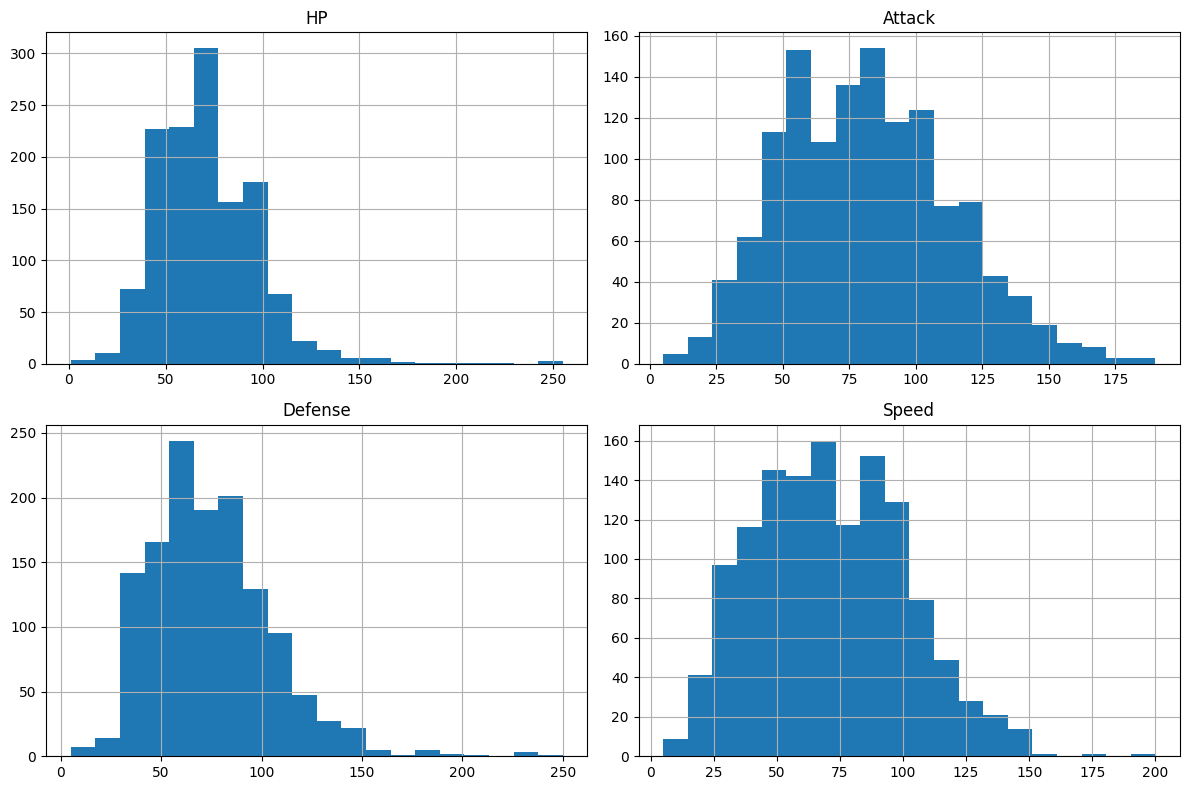

In [ ]:
 # Histogramas para estadísticas de combate (versión simple)
  # Primero extraer las estadísticas de la columna 'stats'

  # Crear columnas de estadísticas básicas
if 'stats' in df_limpio.columns:
      # Extraer HP
      df_limpio['hp'] = df_limpio['stats'].str.extract(r'hp=(\d+)').astype(float)
      # Extraer Attack
      df_limpio['attack'] = df_limpio['stats'].str.extract(r'attack=(\d+)').astype(float)
      # Extraer Defense
      df_limpio['defense'] = df_limpio['stats'].str.extract(r'defense=(\d+)').astype(float)
      # Extraer Speed
      df_limpio['speed'] = df_limpio['stats'].str.extract(r'speed=(\d+)').astype(float)

  # Hacer histogramas simples
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df_limpio['hp'].hist(bins=20)
plt.title('HP')

plt.subplot(2, 2, 2)
df_limpio['attack'].hist(bins=20)
plt.title('Attack')

plt.subplot(2, 2, 3)
df_limpio['defense'].hist(bins=20)
plt.title('Defense')

plt.subplot(2, 2, 4)
df_limpio['speed'].hist(bins=20)
plt.title('Speed')

plt.tight_layout()
plt.show()


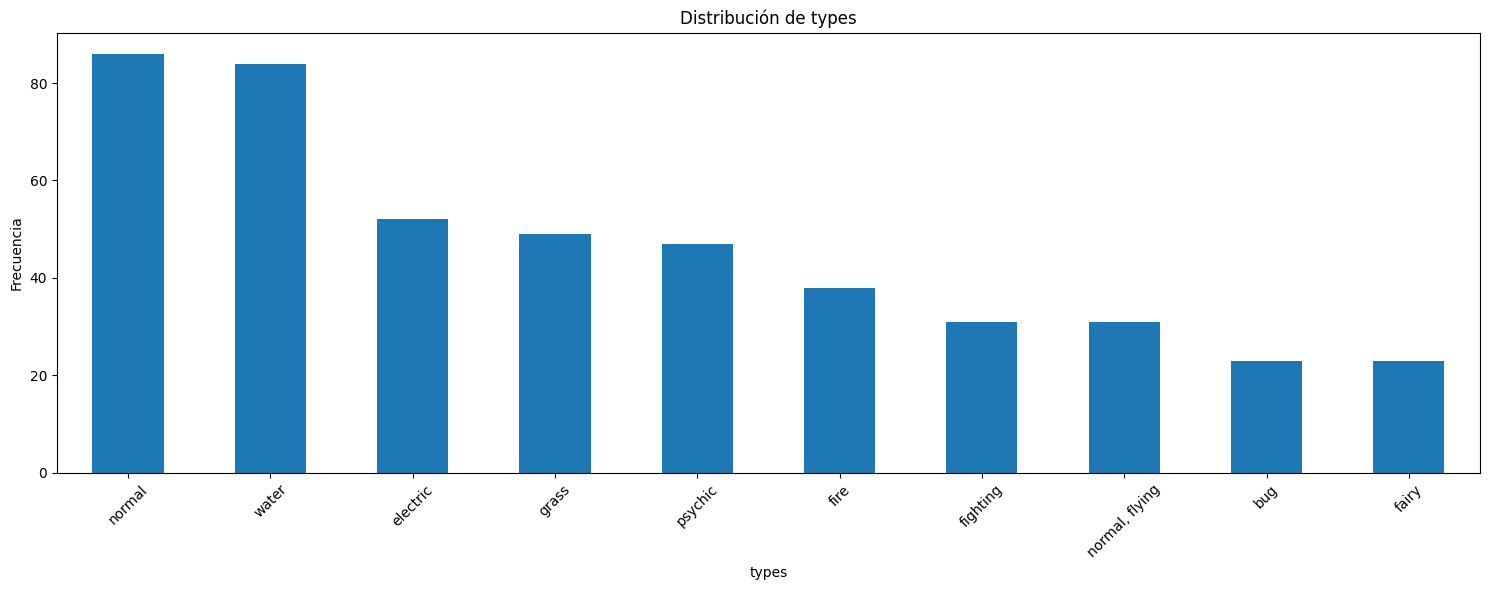

In [ ]:
# Gráficos de barras para tipos de Pokémon
columnas_tipo = [col for col in df_limpio.columns if 'type' in col.lower()]

if len(columnas_tipo) > 0:
    n_cols = min(2, len(columnas_tipo))
    n_rows = (len(columnas_tipo) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_tipo):
        if i < len(axes):
            # Mostrar solo los 10 tipos más frecuentes
            top_types = df_limpio[col].value_counts().head(10)
            top_types.plot(kind='bar', ax=axes[i], rot=45)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_tipo), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas de tipo para graficar")

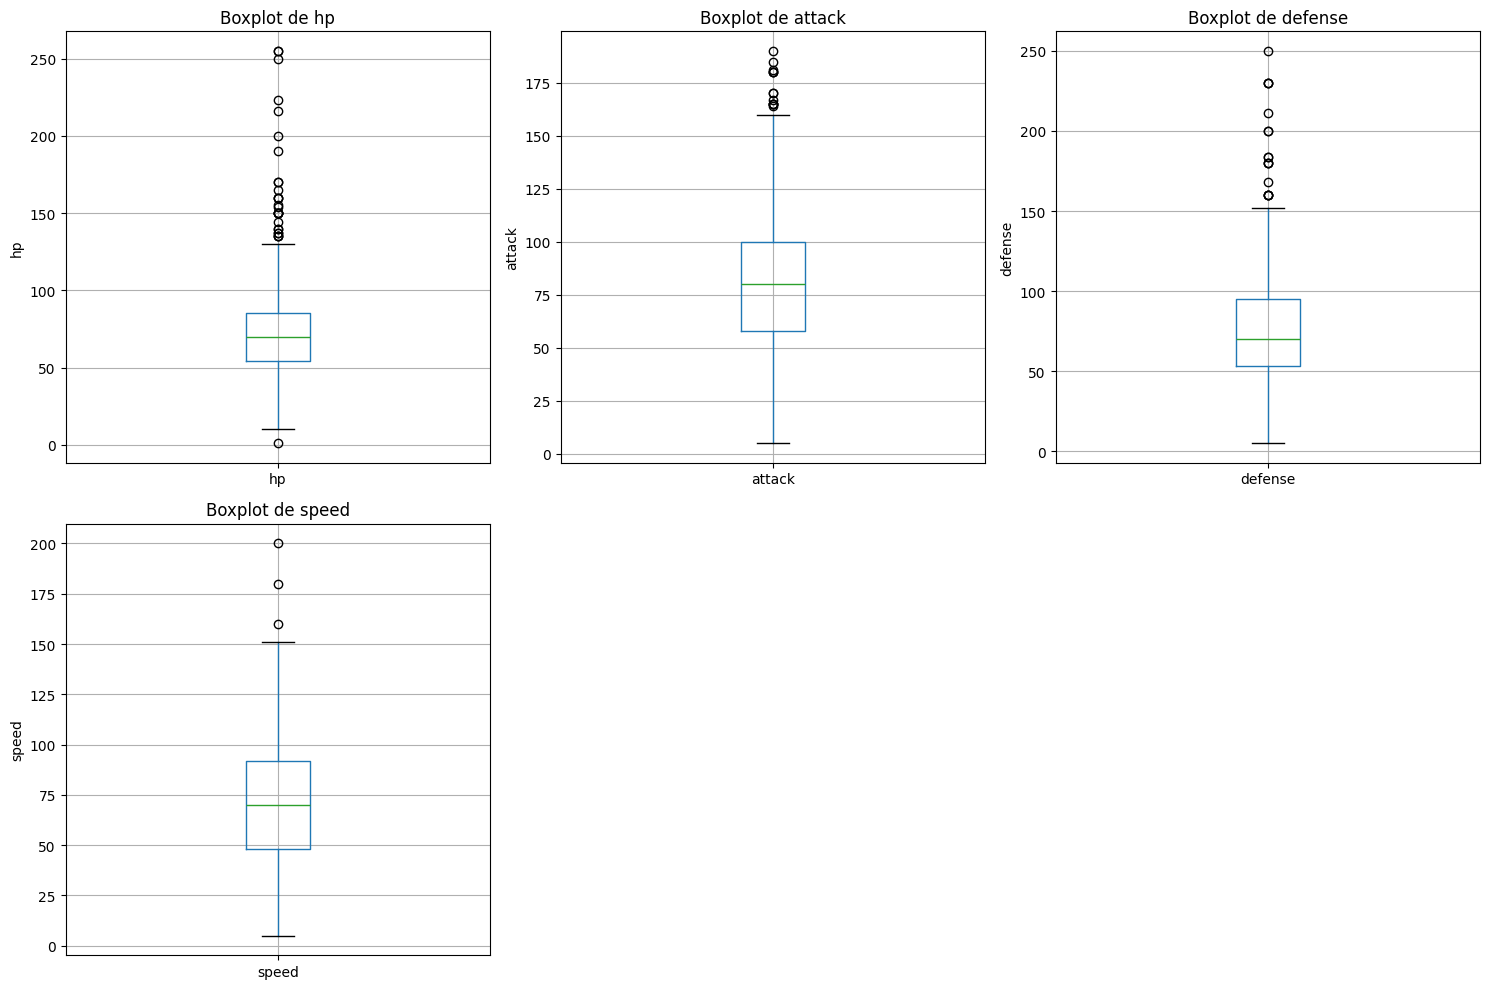

In [ ]:
# Boxplots para detectar outliers en estadísticas de combate
columnas_stats = ['hp', 'attack', 'defense', 'sp._atk', 'sp._def', 'speed']
columnas_disponibles = [col for col in columnas_stats if col in df_limpio.columns]

if len(columnas_disponibles) > 0:
    n_cols = min(3, len(columnas_disponibles))
    n_rows = (len(columnas_disponibles) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_disponibles):
        if i < len(axes):
            df_limpio.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_ylabel(col)

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron estadísticas de combate para boxplots")

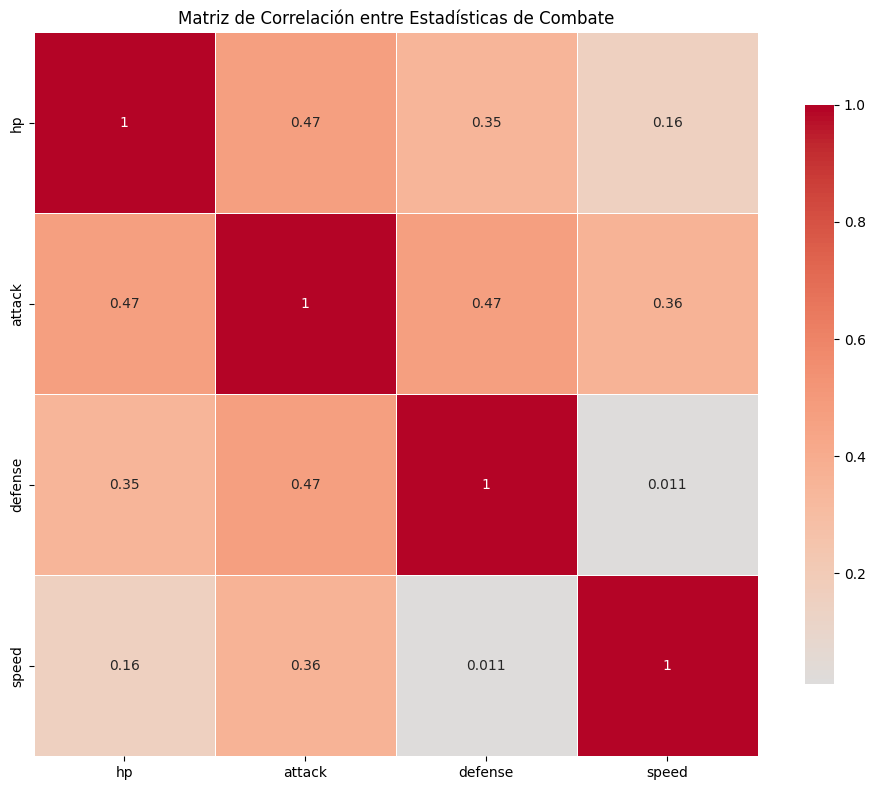

In [ ]:
# Matriz de correlación entre estadísticas de combate
columnas_stats = ['hp', 'attack', 'defense', 'sp._atk', 'sp._def', 'speed']
columnas_disponibles = [col for col in columnas_stats if col in df_limpio.columns]

# Agregar total si existe
if 'total' in df_limpio.columns:
    columnas_disponibles.append('total')

if len(columnas_disponibles) > 1:
    plt.figure(figsize=(10, 8))
    matriz_corr = df_limpio[columnas_disponibles].corr()
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Estadísticas de Combate')
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 variables numéricas para la matriz de correlación")

In [ ]:
# Análisis de columnas numéricas principales
print("Analizando columnas numéricas del dataset...")

# Mostrar las primeras 5 columnas numéricas
if len(columnas_numericas) > 0:
    print(f"\nColumnas numéricas encontradas: {list(columnas_numericas)[:5]}")

    # Mostrar estadísticas básicas
    print("\nEstadísticas básicas de las primeras columnas numéricas:")
    for col in list(columnas_numericas)[:3]:
        print(f"\n{col}:")
        print(f"  - Mínimo: {df_limpio[col].min():.2f}")
        print(f"  - Máximo: {df_limpio[col].max():.2f}")
        print(f"  - Promedio: {df_limpio[col].mean():.2f}")
else:
    print("No se encontraron columnas numéricas en el dataset")

Analizando columnas numéricas del dataset...

Columnas numéricas encontradas: ['id', 'base_experience', 'height', 'weight']

Estadísticas básicas de las primeras columnas numéricas:

id:
  - Mínimo: 1.00
  - Máximo: 10277.00
  - Promedio: 2560.93

base_experience:
  - Mínimo: 36.00
  - Máximo: 608.00
  - Promedio: 161.94

height:
  - Mínimo: 1.00
  - Máximo: 1000.00
  - Promedio: 20.47


## 12. Análisis de Pokémon Legendarios

In [ ]:
  # Análisis de variables categóricas principales
  print("Analizando variables categóricas...")

if len(columnas_categoricas) > 0:
      print(f"\nTotal de columnas categóricas: {len(columnas_categoricas)}")

      # Mostrar información de las primeras 3 columnas categóricas
      for col in list(columnas_categoricas)[:3]:
          num_valores = df_limpio[col].nunique()
          print(f"\n{col}:")
          print(f"  - Valores únicos: {num_valores}")

          # Si tiene pocos valores, mostrar la distribución
          if num_valores <= 10:
              print("  - Distribución:")
              for valor, cuenta in df_limpio[col].value_counts().head(5).items():
                  print(f"    • {valor}: {cuenta}")
          else:
              # Si tiene muchos valores, mostrar los top 5
              print("  - Top 5 valores más frecuentes:")
              for valor, cuenta in df_limpio[col].value_counts().head(5).items():
                  print(f"    • {valor}: {cuenta}")
  else:
      print("\nNo se encontraron columnas categóricas en el dataset")

Analizando variables categóricas...

Total de columnas categóricas: 5

name:
  - Valores únicos: 1302
  - Top 5 valores más frecuentes:
    • terapagos-stellar: 1
    • bulbasaur: 1
    • ivysaur: 1
    • venusaur: 1
    • charmander: 1

types:
  - Valores únicos: 221
  - Top 5 valores más frecuentes:
    • normal: 86
    • water: 84
    • electric: 52
    • grass: 49
    • psychic: 47

abilities:
  - Valores únicos: 707
  - Top 5 valores más frecuentes:
    • levitate: 36
    • static, lightning-rod: 19
    • shields-down: 14
    • beast-boost: 11
    • protosynthesis: 10


In [ ]:
# Análisis de Outliers
print("Análisis de Outliers en columnas numéricas:")

def detectar_outliers_iqr(df, columna):
      Q1 = df[columna].quantile(0.25)
      Q3 = df[columna].quantile(0.75)
      IQR = Q3 - Q1
      limite_inferior = Q1 - 1.5 * IQR
      limite_superior = Q3 + 1.5 * IQR

      outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
      return outliers, limite_inferior, limite_superior

  # Analizar outliers para las primeras columnas numéricas
if len(columnas_numericas) > 0:
      # Analizar máximo 5 columnas numéricas
      for col in list(columnas_numericas)[:5]:
          outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_limpio, col)
          porcentaje_outliers = (len(outliers) / len(df_limpio)) * 100

      print(f"\n{col}:")
      print(f"  - Outliers encontrados: {len(outliers)} ({porcentaje_outliers:.2f}%)")
      print(f"  - Límites IQR: [{lim_inf:.2f}, {lim_sup:.2f}]")
      print(f"  - Rango real: [{df_limpio[col].min():.2f}, {df_limpio[col].max():.2f}]")
else:
print("\nNo hay columnas numéricas para analizar outliers")

Análisis de Outliers en columnas numéricas:

id:
  - Outliers encontrados: 277 (21.27%)
  - Límites IQR: [-649.50, 1952.50]
  - Rango real: [1.00, 10277.00]

base_experience:
  - Outliers encontrados: 2 (0.15%)
  - Límites IQR: [-156.25, 449.75]
  - Rango real: [36.00, 608.00]

height:
  - Outliers encontrados: 94 (7.22%)
  - Límites IQR: [-11.50, 32.50]
  - Rango real: [1.00, 1000.00]

weight:
  - Outliers encontrados: 165 (12.67%)
  - Límites IQR: [-1003.88, 1911.12]
  - Rango real: [0.00, 10000.00]


In [ ]:
# Resumen general del dataset
print("=== RESUMEN GENERAL DEL DATASET ===")

print(f"\n1. INFORMACIÓN BÁSICA:")
print(f"   - Total de filas: {len(df_limpio):,}")
print(f"   - Total de columnas: {len(df_limpio.columns)}")
print(f"   - Columnas numéricas: {len(columnas_numericas)}")
print(f"   - Columnas categóricas: {len(columnas_categoricas)}")

print(f"\n2. COLUMNAS DEL DATASET:")
if len(columnas_numericas) > 0:
    print(f"   - Numéricas: {list(columnas_numericas)[:5]}")
if len(columnas_categoricas) > 0:
    print(f"   - Categóricas: {list(columnas_categoricas)[:5]}")

print(f"\n3. VALORES NULOS:")
total_nulos = df_limpio.isnull().sum().sum()
print(f"   - Total de valores nulos: {total_nulos}")
print(f"   - Porcentaje de datos completos: {((len(df_limpio) * len(df_limpio.columns) - total_nulos) / (len(df_limpio) * len(df_limpio.columns)) * 100):.2f}%")

=== RESUMEN GENERAL DEL DATASET ===

1. INFORMACIÓN BÁSICA:
   - Total de filas: 1,302
   - Total de columnas: 9
   - Columnas numéricas: 4
   - Columnas categóricas: 5

2. COLUMNAS DEL DATASET:
   - Numéricas: ['id', 'base_experience', 'height', 'weight']
   - Categóricas: ['name', 'types', 'abilities', 'moves', 'stats']

3. VALORES NULOS:
   - Total de valores nulos: 0
   - Porcentaje de datos completos: 100.00%


In [ ]:
# Buscar columna de generación
columna_generacion = None
for col in df_limpio.columns:
    if 'generation' in col.lower() or 'gen' in col.lower():
        columna_generacion = col
        break

if columna_generacion:
    print(f"Columna de generación encontrada: {columna_generacion}")

    # Distribución por generación
    print("\nDistribución de Pokémon por generación:")
    print(df_limpio[columna_generacion].value_counts().sort_index())

    # Evolución del poder promedio por generación
    if 'total' in df_limpio.columns:
        poder_por_gen = df_limpio.groupby(columna_generacion)['total'].mean().sort_index()
        print("\nPoder promedio por generación:")
        print(poder_por_gen)
else:
    print("No se encontró columna de generación")
    print("\nColumnas disponibles en el dataset:")
    print(df_limpio.columns.tolist())

No se encontró columna de generación

Columnas disponibles en el dataset:
['id', 'name', 'base_experience', 'height', 'weight', 'types', 'abilities', 'moves', 'stats']


## 16. Top 10 Pokémon más Poderosos

In [ ]:
# Matriz de correlación
print("Correlaciones entre variables numéricas:")

if len(columnas_numericas) > 1:
    matriz_corr = df_limpio[columnas_numericas].corr()
    print(matriz_corr)
else:
    print("No hay suficientes columnas numéricas")

Correlaciones entre variables numéricas:
                       id  base_experience    height    weight
id               1.000000         0.264472  0.299483  0.310241
base_experience  0.264472         1.000000  0.256212  0.365585
height           0.299483         0.256212  1.000000  0.674194
weight           0.310241         0.365585  0.674194  1.000000


## 17. Resumen de Hallazgos

In [ ]:
# Identificar los registros con valores más altos
print("=== TOP 10 REGISTROS ===")

# Buscar si existe alguna columna numérica para ordenar
if len(columnas_numericas) > 0:
    # Usar la primera columna numérica disponible
    columna_ordenar = columnas_numericas[0]

    # Obtener top 10
    top_10 = df_limpio.nlargest(10, columna_ordenar)
    print(f"Top 10 registros por '{columna_ordenar}':")
    print(top_10)
else:
    print("No hay columnas numéricas para ordenar")
    print("Mostrando las primeras 10 filas:")
    print(df_limpio.head(10))

=== TOP 10 REGISTROS ===
Top 10 registros por 'id':
         id                      name  base_experience  height  weight  \
1301  10277         terapagos-stellar               90      17     770   
1300  10276        terapagos-terastal               90       3     160   
1299  10275  ogerpon-cornerstone-mask              275      12     398   
1298  10274  ogerpon-hearthflame-mask              275      12     398   
1297  10273   ogerpon-wellspring-mask              275      12     398   
1296  10272        ursaluna-bloodmoon              275      24    2900   
1295  10271       miraidon-glide-mode              335      28    2400   
1294  10270     miraidon-aquatic-mode              335      28    2400   
1293  10269       miraidon-drive-mode              335      28    2400   
1292  10268   miraidon-low-power-mode              335      28    2400   

                 types                     abilities  \
1301            normal                 teraform-zero   
1300            norma

## 18. Identificación de Problemática a Abordar

In [ ]:
# Verificar qué columnas tenemos para sugerir problemas específicos
tiene_categoricas = len(columnas_categoricas) > 0
tiene_numericas = len(columnas_numericas) > 0

if tiene_categoricas and tiene_numericas:
    print("\n1. CLASIFICACIÓN:")
    print("   - Predecir una variable categórica usando las numéricas")
    print(f"   - Variables categóricas disponibles: {list(columnas_categoricas)[:3]}")
    print(f"   - Variables numéricas disponibles: {list(columnas_numericas)[:3]}")

if tiene_numericas and len(columnas_numericas) > 1:
    print("\n2. REGRESIÓN:")
    print("   - Predecir una variable numérica usando las demás")
    print(f"   - Posibles variables objetivo: {list(columnas_numericas)[:3]}")

if tiene_numericas and len(columnas_numericas) > 3:
    print("\n3. CLUSTERING:")
    print("   - Agrupar registros similares")
    print("   - No requiere variable objetivo")
    print(f"   - Usar las {len(columnas_numericas)} variables numéricas disponibles")

print("\nRECOMENDACIÓN BASADA EN TUS DATOS:")
if len(columnas_numericas) > 5:
    print("   - CLUSTERING: Tienes muchas variables numéricas, ideal para encontrar grupos")
elif tiene_categoricas and tiene_numericas:
    print("   - CLASIFICACIÓN: Tienes variables categóricas que puedes predecir")
else:
    print("   - Necesitas más análisis para determinar el mejor enfoque")


1. CLASIFICACIÓN:
   - Predecir una variable categórica usando las numéricas
   - Variables categóricas disponibles: ['name', 'types', 'abilities']
   - Variables numéricas disponibles: ['id', 'base_experience', 'height']

2. REGRESIÓN:
   - Predecir una variable numérica usando las demás
   - Posibles variables objetivo: ['id', 'base_experience', 'height']

3. CLUSTERING:
   - Agrupar registros similares
   - No requiere variable objetivo
   - Usar las 4 variables numéricas disponibles

RECOMENDACIÓN BASADA EN TUS DATOS:
   - CLASIFICACIÓN: Tienes variables categóricas que puedes predecir
